# Basic Assessment of the HMDA Dataset

The objective for this milestone is to compute and chart metrics to understand
- The distribution of the key demographics, and
- The relationship between demographics, input features (for example, income), and whether a mortgage was originated or not

Key terms:
- Protected characteristics are attributes of humans for which discrimination must not take place. The most common of these are gender and race; however, other attributes include marital status and belonging to a religious community, among others. In many countries, it is against the law to discriminate against anyone based on protected attributes.
- A Privileged group is a set of individuals who hold a characteristic which is considered privileged; that is, a characteristic for which individuals have been historically preferentially treated compared (in a relative analysis) to those without this characteristic. For example, with respect to gender, if it has been found that males have in the past been systematically granted a positive outcome more frequently than females, the male group is deemed the privileged group. Crucially, being able to identify which groups are considered as either privileged or unprivileged requires domain and context knowledge.


## 1. Load the HMDA dataset into a pandas dataframe as was done in the first milestone.


In [106]:
# import pandas
import pandas as pd

# load data
df = pd.read_pickle('mortgage_data_balanced.pkl.gz')

# show df head
df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2011,0000009179,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1653,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,0
1,2011,0000476810,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,31273,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,0
2,2011,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1164651,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,0
3,2011,0000030052,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,515,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,0
4,2011,0002888798,Federal Reserve System,FRS,2,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,44491,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,0


## 2. Compute the frequencies of the key demographics in the dataset.

In [2]:
# applicant_ethnicity_name

df['applicant_ethnicity_name'].value_counts()

Not Hispanic or Latino    154805
Hispanic or Latino         11145
Name: applicant_ethnicity_name, dtype: int64

In [3]:
# applicant_race_name_1

df['applicant_race_name_1'].value_counts()

White                                        142230
Black or African American                     12726
Asian                                          9119
American Indian or Alaska Native               1225
Native Hawaiian or Other Pacific Islander       650
Name: applicant_race_name_1, dtype: int64

In [4]:
# applicant_sex_name

df['applicant_sex_name'].value_counts()

Male      115246
Female     50704
Name: applicant_sex_name, dtype: int64

## 3. Compute and chart the frequencies of outcomes.

In [5]:
# Compute the frequency of the action_taken_name column.

df['action_taken_name'].value_counts()

Loan originated                                94937
Application denied by financial institution    71013
Name: action_taken_name, dtype: int64

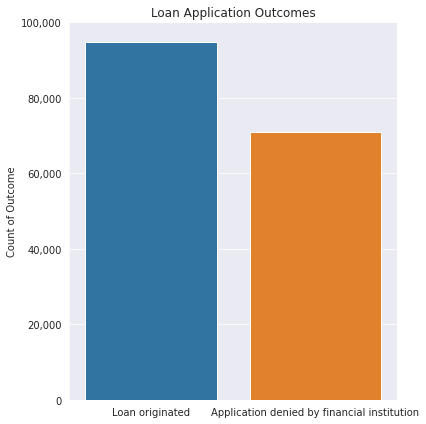

In [6]:
# Use the seaborn package to chart the values of the column action_taken_name as a bar plot.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

plt.figure(figsize=(6,6))
sns.barplot(x=df['action_taken_name'].value_counts().index, 
            y=df['action_taken_name'].value_counts())
plt.yticks([x for x in range(0,12*10**4,2*10**4)],[f'{x:,}' for x in range(0,12*10**4,2*10**4)])
plt.title('Loan Application Outcomes')
plt.ylabel('Count of Outcome')
plt.tight_layout()


## 4. Chart a histogram of applicant income

<AxesSubplot:xlabel='applicant_income_000s', ylabel='Count'>

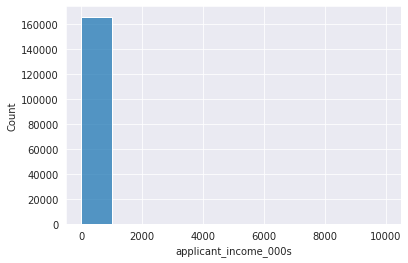

In [7]:
# Use the seaborn package to build a histogram of applicant_income_000s values.

# 10 bins example

sns.histplot(data=df, x='applicant_income_000s', bins=10)

<AxesSubplot:xlabel='applicant_income_000s', ylabel='Count'>

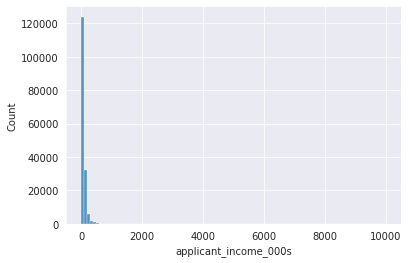

In [8]:
# 100 bins example

sns.histplot(data=df, x='applicant_income_000s', bins=100)

Text(0.5, 1.0, 'Histogram of applicant incomes')

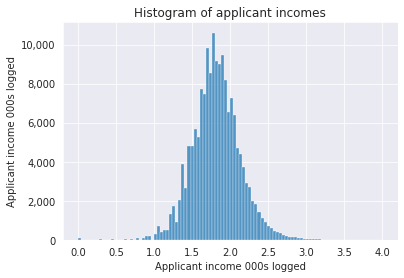

In [42]:
# Applying a log transformation to applicant_income_000s (base 10), add to dataframe and then plot. 

import numpy as np

# add new column containing logged values of income
df['log_10_applicant_income_000s'] = np.log10(df['applicant_income_000s'])

# histogram of logged applicant incomes
sns.histplot(data=df, x='log_10_applicant_income_000s', bins=100)
plt.xlabel('Applicant income 000s logged')
plt.ylabel('Applicant income 000s logged')
plt.yticks([x for x in range(0,11000,2000)],[f'{x:,}' for x in range(0,11000,2000)])
plt.title('Histogram of applicant incomes')

## 5. Use the seaborn package to plot a histogram of log(applicant_income_000s) in relation to applicant_sex_name, overlaying the genders (male and female) in the same plot.

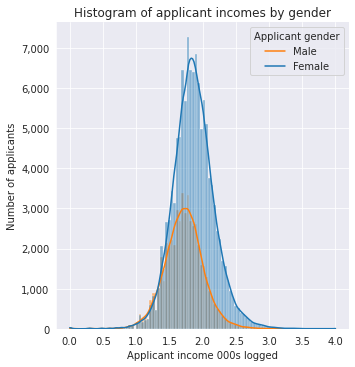

In [41]:
# plot

sns.displot(df, x='log_10_applicant_income_000s', hue='applicant_sex_name', kde=True, legend=False, bins=100)
plt.legend(labels=['Male','Female'],title='Applicant gender')
plt.xlabel('Applicant income 000s logged')
plt.ylabel('Number of applicants')
plt.yticks([x for x in range(0,8000,1000)],[f'{x:,}' for x in range(0,8000,1000)])
plt.title('Histogram of applicant incomes by gender')
plt.show()

## 6. Investigate the relationship between the key demographics and whether a mortgage was originated.

In [89]:
# (applicant_enthicity_name) and mortgage origination (action_taken_name)

pd.crosstab(df['applicant_ethnicity_name'], df['action_taken_name']) / df.shape[0] * 100

action_taken_name,Application denied by financial institution,Loan originated
applicant_ethnicity_name,,
Hispanic or Latino,4.066285,2.649593
Not Hispanic or Latino,38.725520,54.558602


In [91]:
# (applicant_race_name) and mortgage origination (action_taken_name)

pd.crosstab(df['applicant_race_name_1'], df['action_taken_name']) / df.shape[0] * 100

action_taken_name,Application denied by financial institution,Loan originated
applicant_race_name_1,,
American Indian or Alaska Native,0.476650,0.261525
Asian,1.927086,3.567942
Black or African American,5.504670,2.163905
Native Hawaiian or Other Pacific Islander,0.219343,0.172341
White,34.664055,51.042483


In [90]:
# (applicant_sex_name) and mortgage origination (action_taken_name)

pd.crosstab(df['applicant_sex_name'], df['action_taken_name']) / df.shape[0] * 100

action_taken_name,Application denied by financial institution,Loan originated
applicant_sex_name,,
Female,15.658933,14.894848
Male,27.132871,42.313347


## 7. Use the seaborn package to chart the result for applicant_sex_name and action_taken_name.

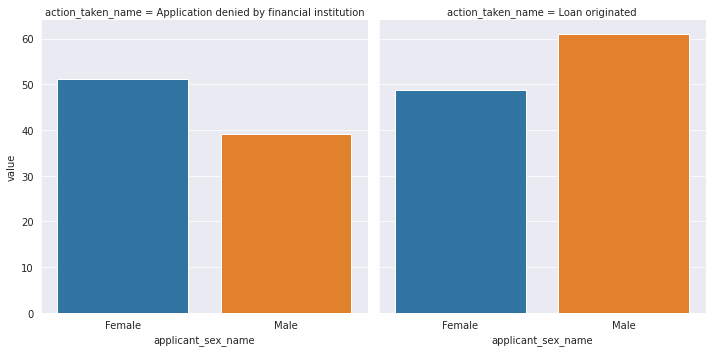

In [134]:
df_2 = pd.crosstab(df["applicant_sex_name"], df["action_taken_name"])

df_3 = df_2.div(df_2.sum(axis=1), axis=0)*100

df_4 = df_3.stack().reset_index().rename(columns={0: 'value'})

sns.catplot(data=df_4, x='applicant_sex_name', y='value', col='action_taken_name', kind="bar")
